###토양오염실태조사결과_조사기관별 오염도에서 서울특별시를 기준으로 오염도분류
####2005~2020년까지 조사된 오염물질별 오염수치를 최대 최소 평균 값으로 표시한 csv파일
####각 물질별 최대,최소,평균 오염수치를 그래프에 표현

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import numpy as np
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *

In [7]:
# csv 파일을 데이터프레임으로 바꾸기 
# 인코딩 : UnicodeDecodeError가 발생하면 encoding을 바꿔볼것
# utf-8, euc-kr, cp949
# 파일을 인덱스로 지정
data1 = pd.read_csv('/content/drive/MyDrive/finalpj_data/토양오염.csv')
data1

,No,분류,분류.1,지점수,시료수,카드뮴 Cd,구리 Cu,비소 As,수은 Hg,납 Pb,...,유류.1,유류.2,유류.3,유류.4,유류.5,트리클로로에틸렌 TCE,테트라클로로에틸렌 PCE,벤조(a)피렌,"1,2-디클로로에탄 1,2-DCA",수소이온농도 pH
0,No,분류,분류,지점수,시료수,카드뮴 Cd,구리 Cu,비소 As,수은 Hg,납 Pb,...,유류,유류,유류,유류,유류,트리클로로에틸렌 TCE,테트라클로로에틸렌 PCE,벤조(a)피렌,"1,2-디클로로에탄 1,2-DCA",수소이온농도 pH
1,No,분류,분류,지점수,시료수,카드뮴 Cd,구리 Cu,비소 As,수은 Hg,납 Pb,...,벤젠,톨루엔,에틸벤젠,크실렌,석유계총탄화수소 TPH,트리클로로에틸렌 TCE,테트라클로로에틸렌 PCE,벤조(a)피렌,"1,2-디클로로에탄 1,2-DCA",수소이온농도 pH
2,No,분류,분류,개,개,mg/kg,mg/kg,mg/kg,mg/kg,mg/kg,...,mg/kg,mg/kg,mg/kg,mg/kg,mg/kg,mg/kg,mg/kg,mg/kg,mg/kg,pH
3,No,분류,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,...,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
4,1,계,최대,"2,619","3,490",25.37,"40,265.20",467.36,9.23,"4,114.90",...,4.5,38.1,9.3,33.6,"10,943",9.3,74.9,0.375,0,12.5
5,2,계,최소,"2,619","3,490",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.3
6,3,계,평균,"2,619","3,490",0.765,48.547,5.47,0.039,32.372,...,0.006,0.036,0.008,0.043,91.269,0.009,0.048,0.007,0,7.549
7,4,서울특별시,최대,337,396,2.04,"1,993.50",36.72,5.63,"1,091.70",...,0,0.8,0.5,1.1,"3,429",3.2,0,0.135,0,12.5
8,5,서울특별시,최소,337,396,0,3,0,0,7.8,...,0,0,0,0,0,0,0,0,0,4.1
9,6,서울특별시,평균,337,396,0.307,58.286,5.483,0.122,37.115,...,0,0.009,0.002,0.006,103.195,0.011,0,0.013,0,8.509


In [8]:
data1.columns

Index(['No', '분류', '분류.1', '지점수', '시료수', '카드뮴 Cd', '구리 Cu', '비소 As', '수은 Hg',
       '납 Pb', '6가크롬 Cr6+', '아연 Zn', '니켈 Ni', '불소 F', '유기인',
       '폴리클로리네이티드비페닐 PCB', '시안 CN', '페놀류', '유류', '유류.1', '유류.2', '유류.3',
       '유류.4', '유류.5', '트리클로로에틸렌 TCE', '테트라클로로에틸렌 PCE', '벤조(a)피렌',
       '1,2-디클로로에탄 1,2-DCA', '수소이온농도 pH'],
      dtype='object')

In [13]:
data1_1=data1.loc[7:9,[ '카드뮴 Cd', '구리 Cu', '비소 As', '수은 Hg',
       '납 Pb', '6가크롬 Cr6+', '아연 Zn', '니켈 Ni', '불소 F', '유기인',
       '폴리클로리네이티드비페닐 PCB', '시안 CN', '페놀류', '트리클로로에틸렌 TCE', '테트라클로로에틸렌 PCE', '벤조(a)피렌',
       '1,2-디클로로에탄 1,2-DCA', '수소이온농도 pH']]
data1_1

,카드뮴 Cd,구리 Cu,비소 As,수은 Hg,납 Pb,6가크롬 Cr6+,아연 Zn,니켈 Ni,불소 F,유기인,폴리클로리네이티드비페닐 PCB,시안 CN,페놀류,트리클로로에틸렌 TCE,테트라클로로에틸렌 PCE,벤조(a)피렌,"1,2-디클로로에탄 1,2-DCA",수소이온농도 pH
7,2.04,"1,993.50",36.72,5.63,"1,091.70",12.4,"1,238.30",136.8,513,0,0.12,0,1,3.2,0,0.135,0,12.5
8,0,3,0,0,7.8,0,25.5,2.4,19,0,0,0,0,0,0,0,0,4.1
9,0.307,58.286,5.483,0.122,37.115,0.054,130.939,21.121,173.178,0,0.004,0,0.028,0.011,0,0.013,0,8.509


In [14]:
data1_1=data1_1.transpose()
data1_1

,7,8,9
카드뮴 Cd,2.04,0,0.307
구리 Cu,"1,993.50",3,58.286
비소 As,36.72,0,5.483
수은 Hg,5.63,0,0.122
납 Pb,"1,091.70",7.8,37.115
6가크롬 Cr6+,12.4,0,0.054
아연 Zn,"1,238.30",25.5,130.939
니켈 Ni,136.8,2.4,21.121
불소 F,513,19,173.178
유기인,0,0,0


In [17]:
cost0

카드뮴 Cd           2.04
구리 Cu        1,993.50
비소 As           36.72
수은 Hg            5.63
납 Pb         1,091.70
6가크롬 Cr6+        12.4
아연 Zn        1,238.30
니켈 Ni           136.8
불소 F              513
Name: 7, dtype: object

Text(0, 0.5, 'money')

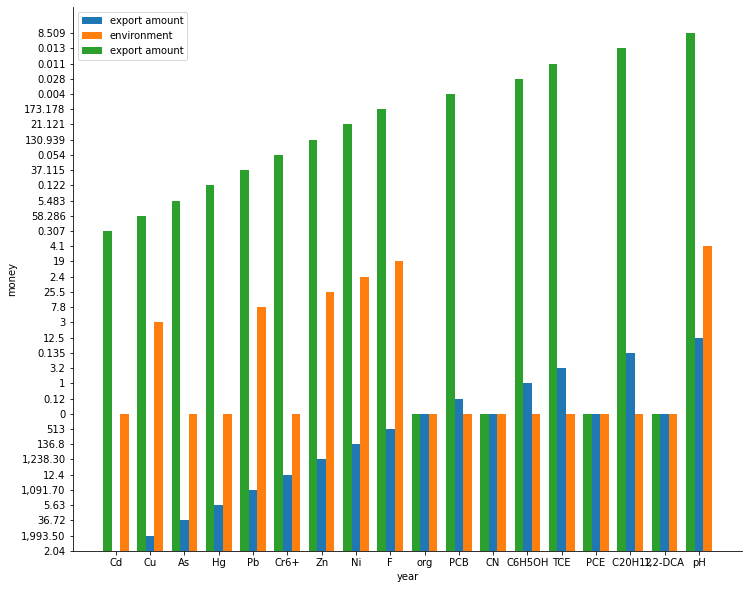

In [28]:
#그래프 추출 범위지정
data1_1=data1.loc[7:9,['카드뮴 Cd', '구리 Cu', '비소 As', '수은 Hg',
       '납 Pb', '6가크롬 Cr6+', '아연 Zn', '니켈 Ni', '불소 F', '유기인',
       '폴리클로리네이티드비페닐 PCB', '시안 CN', '페놀류', '트리클로로에틸렌 TCE', '테트라클로로에틸렌 PCE', '벤조(a)피렌',
       '1,2-디클로로에탄 1,2-DCA', '수소이온농도 pH']]
data1_1=data1_1.transpose()

#환경오염물질별 막대그래프 
cost0 = data1_1[7][0:18]
cost1 =data1_1[8][0:18]
cost1.index = ['Cd', 'Cu', 'As', 'Hg',
       'Pb', 'Cr6+', 'Zn', 'Ni', 'F', 'org',
       'PCB', 'CN', 'C6H5OH', 'TCE', 'PCE', ' C20H12',
       '1,2-DCA', 'pH']

cost2 = data1_1[9][0:18]

#바의 넓이, 그래프크기 지정
bar_width=0.25
fig, ax = plt.subplots(figsize=(12,10))

index = np.arange(len(cost1.index))
plt.bar(index,cost0,bar_width,label='max')
plt.bar(index+bar_width,cost1,bar_width,label='min')
plt.bar(index-bar_width,cost2,bar_width, label='evg')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(index,cost1.index)
#plt.yticks([0, 18])

plt.legend()
plt.xlabel('year')
plt.ylabel('money')  